In [1]:
import sys
print(sys.executable)
import os
import sys
if os.getcwd().endswith('visualize'):
    os.chdir('..')
sys.path.append(os.getcwd())


/usr/bin/python


In [2]:
import os
import sys
if os.getcwd().endswith('visualize'):
    os.chdir('..')
sys.path.append(os.getcwd())
from loader.dataloader import VideoDataSet,VideoDataLoader
import torch


dataset ="50salads"
split_test = "test.split2.bundle"
split_train = "train.split2.bundle"

default_path="./data/data/"
knowns = 14
unknowns = 5
prototypes = 30
video_dataset_test = VideoDataSet(dataset=dataset,
                               split=split_test,
                               default_path=default_path,
                               knowns=knowns,
                               unknowns=unknowns,
                               total_classes=knowns + prototypes)
data_loader_test = VideoDataLoader(video_dataset_test, batch_size=1, shuffle=True)

video_dataset_train = VideoDataSet(dataset=dataset,
                               split=split_train,
                               default_path=default_path,
                               knowns=knowns,
                               unknowns=unknowns,
                               total_classes=knowns + prototypes)
data_loader_train = VideoDataLoader(video_dataset_train, batch_size=1, shuffle=False)

tensor([True, True, True,  ..., True, True, True])
tensor([True, True, True,  ..., True, True, True])
tensor([True, True, True,  ..., True, True, True])
tensor([True, True, True,  ..., True, True, True])
tensor([True, True, True,  ..., True, True, True])
tensor([True, True, True,  ..., True, True, True])
tensor([True, True, True,  ..., True, True, True])
tensor([True, True, True,  ..., True, True, True])
tensor([True, True, True,  ..., True, True, True])
tensor([True, True, True,  ..., True, True, True])
tensor([True, True, True,  ..., True, True, True])
tensor([True, True, True,  ..., True, True, True])
tensor([True, True, True,  ..., True, True, True])
tensor([True, True, True,  ..., True, True, True])
tensor([True, True, True,  ..., True, True, True])
tensor([True, True, True,  ..., True, True, True])
tensor([True, True, True,  ..., True, True, True])
tensor([True, True, True,  ..., True, True, True])
tensor([True, True, True,  ..., True, True, True])
tensor([True, True, True,  ...,

In [3]:
from model.bert import ActionBERT, ActionBERTConfig
import torch.nn.functional as F

knowns = 14
unknowns = 5
prototypes = 0
train_for_knowns = True

bert_conf = ActionBERTConfig(
    known_classes=knowns,
    input_dim=2048,
    d_model=256,
    num_heads=8,
    num_layers=3,
    local_window_size=128,
    window_dilation=32,
    dropout=0)
model = ActionBERT(config=bert_conf, train_for_knowns=train_for_knowns)

path = "./output/actionbert_known_split2.pth"

state_dict = torch.load(path, map_location=torch.device('cuda'))
model.load_state_dict(state_dict, strict=False)
model = model.to('cuda')
model.eval()
print("Modell erfolgreich geladen.")

def get_model_pred(features,padding_mask):
    unknown_mask = torch.zeros_like(padding_mask).bool()
    res  = model(features,unknown_mask,padding_mask)
    
    
    """pred_dist_start = torch.exp(boundaries[:, :, 0]) - 1
    pred_dist_end   = torch.exp(boundaries[:, :, 1]) - 1
   # pred_dist_start = torch.clamp(pred_dist_start, min=0)
    #pred_dist_end   = torch.clamp(pred_dist_end, min=0)
    
    B, T = pred_dist_start.shape
    device = pred_dist_start.device
    
   
    t_indices = torch.arange(T, device=device).unsqueeze(0).expand(B, T)
    vote_start = torch.round(t_indices - pred_dist_start).long()
    vote_end   = torch.round(t_indices + pred_dist_end ).long()
    """
    softmax_logits = F.softmax(res["refine_logits"], dim=-1)  
    class_labels = torch.argmax(softmax_logits,dim=-1)
   
    return class_labels
    
def _generate_structured_mask( features, mask_ratio=0.75, block_size=64):
        """
        Structured Masking: Unterteilt das Video in Blöcke der Größe 'block_size'.
        In JEDEM Block werden 'mask_ratio' Prozent maskiert.
        Das verhindert riesige Lücken und garantiert eine gleichmäßige Schwierigkeit.
        """
        B, S, D = features.size()
        mask = torch.zeros((B, S), dtype=torch.bool)

        mask_len_per_block = int(block_size * mask_ratio)

        for t in range(0, S, block_size):
            end_t = min(t + block_size, S)
            actual_block_len = end_t - t

            curr_mask_len = int(actual_block_len * mask_ratio)

            if curr_mask_len == 0:
                continue

            max_start = actual_block_len - curr_mask_len

            if max_start > 0:

                rel_starts = torch.randint(0, max_start, (B,))

                for b in range(B):
                    abs_start = t + rel_starts[b].item()
                    mask[b, abs_start: abs_start + curr_mask_len] = True
            else:
                mask[:, t:end_t] = True

        return mask.to('cuda')


/tmp/ipykernel_51145/2172070323.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(path, map_location=torch.device('cuda'))


Modell erfolgreich geladen.


In [3]:
for batch_test in data_loader_test:
    features = batch_test["features"]
    unknown_mask = batch_test["unknown_mask"]
    target_truth = batch_test["target_truth"]
    padding_mask = batch_test["padding_mask"]
    labels_dict = batch_test["labels_dict"]
    remap_dict = batch_test["remap_dict"]
    target_start = batch_test['target_start']
    target_end = batch_test['target_end']
   
   
   
   
    
    break
for batch_train in data_loader_train:

   
   
   
   
    
    break

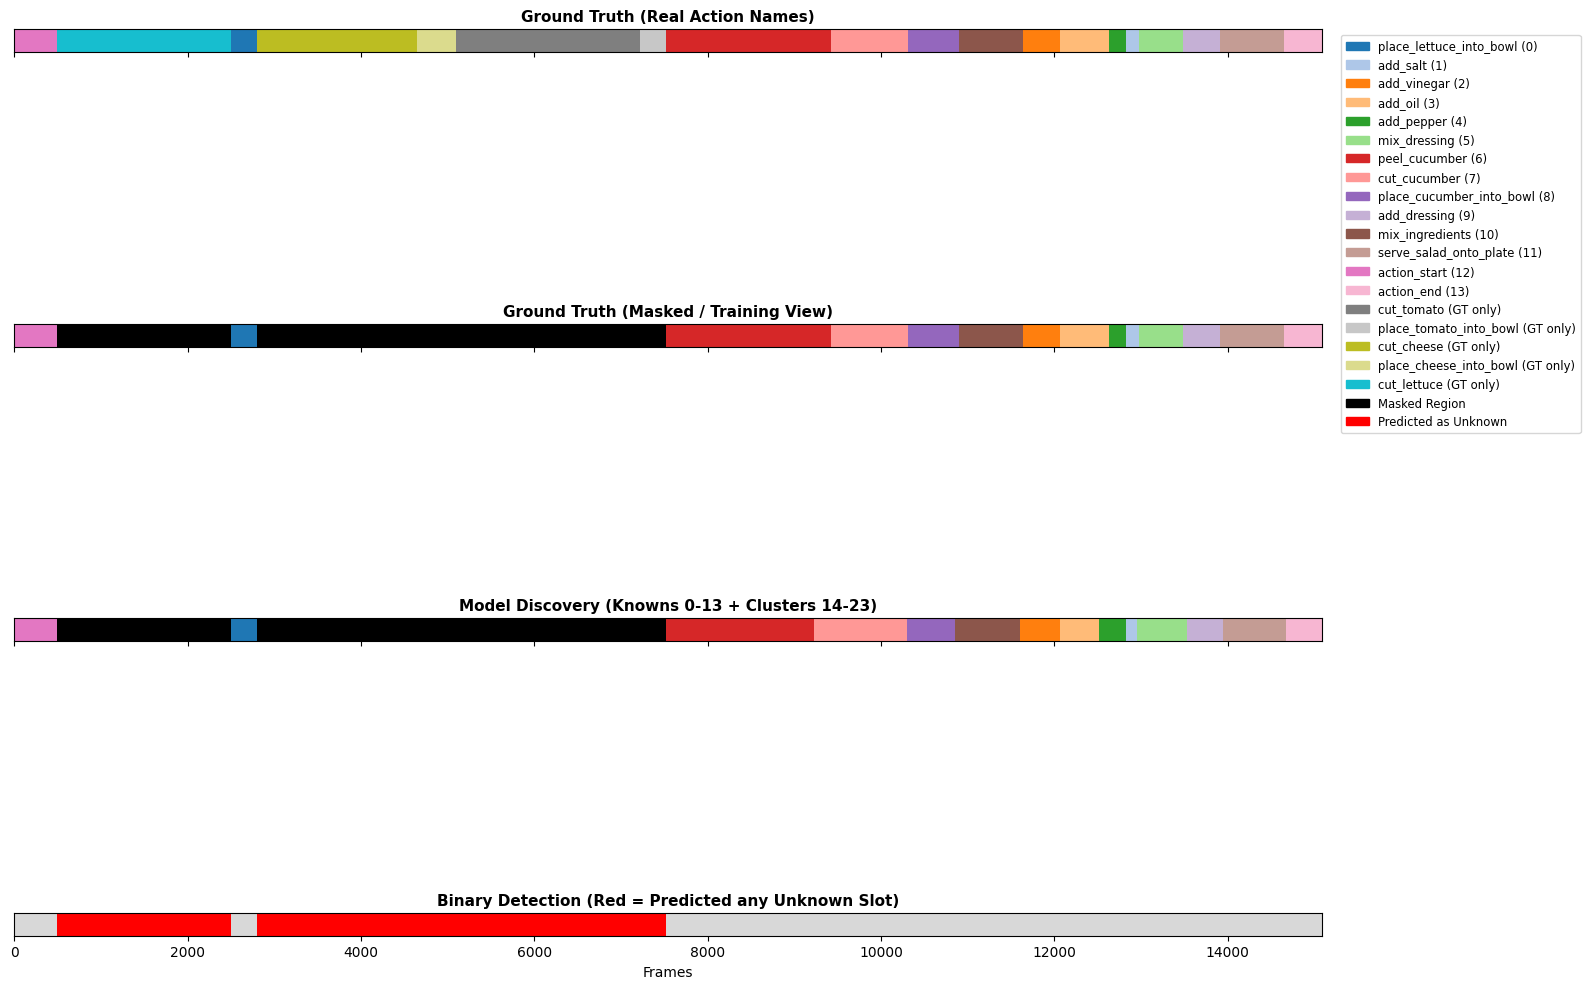

In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import torch

# --- KONFIGURATION ---
NUM_KNOWNS = 14          # Bekannte Klassen (0-13)
NUM_PSEUDO_UNKNOWNS = 0 # Deine 10 Pseudo-Slots (14-23)
FIRST_UNK_ID = NUM_KNOWNS
LAST_UNK_ID = NUM_KNOWNS + NUM_PSEUDO_UNKNOWNS - 1

for batch_test in data_loader_test:
    features = batch_test["features"]
    unknown_mask = batch_test["unknown_mask"]
    target_truth = batch_test["target_truth"]
    padding_mask = batch_test["padding_mask"]
    labels_dict = batch_test["labels_dict"]
    break

# 1. Model Prediction (jetzt 0 bis 23)
# Wir gehen davon aus, dass get_model_pred den argmax über alle 24 Klassen liefert
res = get_model_pred(features.to('cuda'), padding_mask.to('cuda'))
if isinstance(res, tuple): res = res[0] # Falls (res, unk) zurückkommt, nimm res
res = res.squeeze(0).cpu().numpy()

pad_mask_np = padding_mask.squeeze(0).cpu().numpy().astype(bool)
unknown_mask_np = unknown_mask.squeeze(0).cpu().numpy().astype(bool)
target_truth_np = target_truth.squeeze(0).cpu().numpy()

# Filtern (Padding weg)
target_truth_valid = target_truth_np[pad_mask_np]
unknown_mask_valid = unknown_mask_np[pad_mask_np]
res_valid = res[pad_mask_np]

# --- 2. ID-Mapping ---
raw_dict = labels_dict
if isinstance(raw_dict, list): raw_dict = raw_dict[0]
id_to_name = {v: k for k, v in raw_dict.items()}

# --- 3. Farb-Palette (Erweitert für viele Cluster) ---
# Wir kombinieren mehrere Maps, damit die 10 Cluster unterschiedliche Farben haben
colors_main = plt.get_cmap('tab20').colors
colors_extra = plt.get_cmap('Set3').colors # Hellere Töne für Cluster
base_colors = np.vstack((colors_main, colors_extra))

max_id_present = max(target_truth_valid.max(), res_valid.max(), LAST_UNK_ID)
while len(base_colors) <= max_id_present + 5:
    base_colors = np.vstack((base_colors, base_colors))

color_lut = base_colors.copy()
BLACK_ID = len(color_lut) - 1
color_lut[BLACK_ID] = [0.0, 0.0, 0.0] 

# --- 4. Plot-Daten vorbereiten ---

# GT Real: Zeigt die echten Namen aus dem Dataset (z.B. 15, 16, 17...)
gt_full = target_truth_valid

# GT Masked: Alles Unknown wird schwarz (Trainings-Sicht)
gt_masked = target_truth_valid.copy()
gt_masked[unknown_mask_valid] = BLACK_ID 

# Prediction: Die 14 Knowns + die 10 Pseudo-Cluster (Discovery)
pred_discovery = res_valid 
pred_discovery[unknown_mask_valid] = BLACK_ID
# Binary Detection: Hat das Modell IRGENDEINEN Slot >= 14 gewählt?
# Wir nutzen Rot für "Modell sagt Unknown" und Hellgrau für "Modell sagt Known"
DETECTION_UNK_COLOR = [1.0, 0.0, 0.0]
DETECTION_KNOWN_COLOR = [0.85, 0.85, 0.85]
color_lut = np.vstack((color_lut, DETECTION_UNK_COLOR, DETECTION_KNOWN_COLOR))
IDX_RED = len(color_lut) - 2
IDX_GRAY = len(color_lut) - 1

detection_binary = np.where(res_valid >= FIRST_UNK_ID, IDX_RED, IDX_GRAY)

plots_data = [
    ("Ground Truth (Real Action Names)", gt_full),      
    ("Ground Truth (Masked / Training View)", gt_masked),
    ("Model Discovery (Knowns 0-13 + Clusters 14-23)", pred_discovery),
    ("Binary Detection (Red = Predicted any Unknown Slot)", detection_binary)
]

# --- 5. Plotten ---
fig, axs = plt.subplots(nrows=len(plots_data), ncols=1, figsize=(16, 10), sharex=True)

for i, (title, data_indices) in enumerate(plots_data):
    rgb_image = color_lut[data_indices]
    rgb_image = rgb_image[np.newaxis, :, :] 
    axs[i].imshow(rgb_image, aspect='auto', interpolation='nearest')
    axs[i].set_title(title, fontsize=11, fontweight='bold')
    axs[i].set_yticks([]) 
    if i == len(plots_data) - 1: axs[i].set_xlabel("Frames")

# --- 6. Legende ---
patches = []

# A. Known Actions
for i in range(NUM_KNOWNS):
    if i in id_to_name:
        patches.append(mpatches.Patch(color=color_lut[i], label=f"{id_to_name[i]} ({i})"))

# B. Pseudo-Unknown Clusters (14-23)
for i in range(FIRST_UNK_ID, LAST_UNK_ID + 1):
    patches.append(mpatches.Patch(color=color_lut[i], label=f"Discovery Cluster {i}"))

# C. GT Unknowns (falls IDs im Datensatz höher sind, z.B. 50Salads hat IDs bis 48)
unique_gt = np.unique(gt_full)
for uid in unique_gt:
    if uid >= FIRST_UNK_ID and uid not in range(FIRST_UNK_ID, LAST_UNK_ID + 1) and uid != BLACK_ID:
        name = id_to_name.get(uid, f"GT Class {uid}")
        patches.append(mpatches.Patch(color=color_lut[uid], label=f"{name} (GT only)"))

# D. Zusatz-Infos
patches.append(mpatches.Patch(color=[0,0,0], label="Masked Region"))
patches.append(mpatches.Patch(color=[1,0,0], label="Predicted as Unknown"))

axs[0].legend(handles=patches, bbox_to_anchor=(1.01, 1), loc='upper left', ncol=1, fontsize='small')

plt.tight_layout()
plt.show()

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn.functional as F
import numpy as np
from matplotlib.colors import ListedColormap

def get_alignment_data(model, train_batch, test_batch, device, num_frames=2000):
    """
    Inferiert Embeddings für ein Train- und ein Test-Video und berechnet die Ähnlichkeit.
    """
    model.eval()
    model.to(device)
    
 
    
    with torch.no_grad():
        # Inferenz
        start_one = 300
        start_two =300
        out_train = model(train_batch["features"].to(device), None, train_batch["padding_mask"].to(device))
        out_test = model(test_batch["features"].to(device), None, test_batch["padding_mask"].to(device))
        
        # Embeddings extrahieren & normalisieren (Angular Space)
        # Shape: [num_frames, d_model]
        # 1. Rohe Embeddings extrahieren (noch nicht normalisiert!)
        raw_train = out_train["embeddings"][0] # [T, 256]
        raw_test = out_test["embeddings"][0]   # [T, 256]

        #raw_train = train_batch["features"].to(device)[0]
        #raw_test = train_batch["features"].to(device)[0]

        # --- DER CENTERING FIX ---
        # Wir berechnen den Mittelwert über das GESAMTE Video (oder den Batch)
        # Das verschiebt den Schwerpunkt der Wolke auf den Nullpunkt.
        mean_train = raw_train.mean(dim=0, keepdim=True)
        mean_test = raw_test.mean(dim=0, keepdim=True)

        centered_train = raw_train #- mean_train
        centered_test = raw_test #- mean_test
        # --------------------------

        # 2. Slicing der gewünschten Fenster aus den zentrierten Daten
        # Danach L2-Normalisierung für den Angular Space
        emb_train = F.normalize(centered_train[start_one:start_one+num_frames, :], p=2, dim=-1)
        emb_test = F.normalize(centered_test[start_two:start_two+num_frames, :], p=2, dim=-1)
        
        # 3. Ground Truth Labels extrahieren (bleibt gleich)
        gt_train = train_batch["target_truth"][0, start_one:start_one+num_frames].cpu().numpy()
        gt_test = test_batch["target_truth"][0, start_two:start_two+num_frames].cpu().numpy()
        
        print("Vorhandene Klassen in Train-Fenster:", torch.unique(torch.tensor(gt_train)))
        print("Vorhandene Klassen in Test-Fenster:", torch.unique(torch.tensor(gt_test)))

    # 4. Ähnlichkeitsmatrix berechnen (Cosine Similarity via MatMul)
    # Da wir zentriert und normalisiert haben, ist das Ergebnis jetzt 
    # über die gesamte Kugel verteilt (-1.0 bis 1.0)
    similarity_matrix = torch.matmul(emb_train, emb_test.t()).cpu().numpy()

    return similarity_matrix, gt_train, gt_test

def plot_alignment_matrix(similarity_matrix, gt_train, gt_test, color_lut, id_to_name, title="Cross-Domain Affinity"):
    """
    Erstellt eine Heatmap mit den EXAKT gleichen Farben wie im Bar-Plot.
    """
    fig = plt.figure(figsize=(18, 14))
    
    # Grid-Layout: [Links-Labels, Haupt-Heatmap, Colorbar-Platz]
    gs = plt.GridSpec(2, 3, 
                      width_ratios=[1, 25, 1], 
                      height_ratios=[1, 25], 
                      hspace=0.02, wspace=0.02)

    ax_top = fig.add_subplot(gs[0, 1])
    ax_left = fig.add_subplot(gs[1, 0])
    ax_main = fig.add_subplot(gs[1, 1], sharex=ax_top, sharey=ax_left)
    ax_cbar = fig.add_subplot(gs[1, 2])

    # --- DIE FARB-LOGIK ---
    # Wir erstellen eine Matplotlib-Colormap aus deiner color_lut
    custom_cmap = ListedColormap(color_lut)
    # vmin und vmax müssen den Index-Bereich deiner color_lut abdecken
    v_min = 0
    v_max = len(color_lut) - 1

    # 1. Test-Labels (Oben)
    ax_top.imshow(gt_test[None, :], aspect='auto', cmap=custom_cmap, 
                  interpolation='nearest', vmin=v_min, vmax=v_max)
    ax_top.set_axis_off()
    ax_top.set_title("Test Video Frames (Action Labels)", fontsize=14, pad=10)

    # 2. Train-Labels (Links)
    ax_left.imshow(gt_train[:, None], aspect='auto', cmap=custom_cmap, 
                   interpolation='nearest', vmin=v_min, vmax=v_max)
    ax_left.set_axis_off()

    # 3. Haupt-Heatmap (Ähnlichkeit)
    sns.heatmap(similarity_matrix, ax=ax_main, cmap='vlag', center=0.5, 
                vmin=0, vmax=1, cbar_ax=ax_cbar, 
                cbar_kws={'label': 'Cosine Similarity (Angular)'})
    
    ax_main.set_xlabel("Test Frame Index", fontsize=12)
    ax_main.set_ylabel("Train Frame Index", fontsize=12)
    ax_main.set_xticks([])
    ax_main.set_yticks([])

    # --- LEGENDE HINZUFÜGEN (analog zum anderen Plot) ---
    patches = []
    # Alle IDs finden, die in diesen Ausschnitten vorkommen
    unique_ids = np.unique(np.concatenate([gt_train, gt_test]))
    for uid in sorted(unique_ids):
        if uid == len(color_lut) - 1: # Black / Masked
            patches.append(mpatches.Patch(color=[0,0,0], label="Masked"))
        elif uid in id_to_name:
            patches.append(mpatches.Patch(color=color_lut[int(uid)], label=f"{id_to_name[uid]} ({int(uid)})"))
        else:
            patches.append(mpatches.Patch(color=color_lut[int(uid)], label=f"Cluster {int(uid)}"))

    # Legende ganz links außen oder rechts platzieren
    ax_main.legend(handles=patches, bbox_to_anchor=(-0.15, 1.0), loc='upper right', 
                   fontsize='small', title="Actions")

    plt.suptitle(title, fontsize=18, y=0.98)
    plt.show()

# --- Ausführung ---
# Wir nutzen die Variablen (color_lut, id_to_name), die du im vorherigen Block definiert hast

# --- Ausführung ---
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
iterator = iter(data_loader_train)
b_train1 = next(iterator)
b_train2 = next(iterator)
# 1. Daten berechnen
sim_mat, gt_tr, gt_te = get_alignment_data(
    model, 
    b_train1, 
    b_train1, 
    DEVICE, 
    num_frames=9000
)

# 2. Visualisieren
plot_alignment_matrix(
    sim_mat, 
    gt_tr, 
    gt_te, 
    color_lut,   # <--- Hier übergeben
    id_to_name,  # <--- Hier übergeben
    title="Semantischer Check: Alignieren Train 1 & Train 2 Embeddings"
)

Vorhandene Klassen in Train-Fenster: tensor([ 0,  1,  2, 12, 14, 15, 16, 17, 18])
Vorhandene Klassen in Test-Fenster: tensor([ 0,  1,  2, 12, 14, 15, 16, 17, 18])


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f2bd4160ae0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [17]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import numpy as np
import torch
import torch.nn.functional as F
start_one = 3900
start_two =3900

def analyze_centered_raw_features(model,train_batch, device, eps=0.5, min_samples=30):
    # 1. Rohe Features holen [T, 2048]
    out_train = model(train_batch["features"].to(device), None, train_batch["padding_mask"].to(device))["embeddings"]
    out_test = model(train_batch["features"].to(device), None, train_batch["padding_mask"].to(device))
    
    print(out_train.shape)
    raw_feats = out_train[0][start_one:start_one+600]
    gt = train_batch["target_truth"][0,start_one:start_one+600].cpu().numpy()
    
    # 2. Centering Fix (Den I3D-Klumpen auf den Nullpunkt schieben)
    video_mean = raw_feats.mean(dim=0, keepdim=True)
    centered_feats = raw_feats - video_mean
    
    # 3. Normalisierung (Angular Space ist Pflicht nach dem Centering)
    normed_feats = F.normalize(centered_feats, p=2, dim=-1).cpu().numpy()
    
    # 4. DBSCAN auf den zentrierten Roh-Features
    print(f"Starte DBSCAN auf zentrierten I3D-Features (eps={eps})...")
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(normed_feats)
    cluster_labels = db.labels_
    
    # 5. Visualisierung
    T = len(gt)
    fig, ax = plt.subplots(2, 1, figsize=(18, 5), sharex=True)
    
    # Plot 1: Ground Truth
    ax[0].imshow(gt[None, :], aspect='auto', interpolation='nearest', cmap='tab20')
    ax[0].set_yticks([])
    ax[0].set_ylabel("Ground\nTruth", rotation=0, labelpad=40, va='center', fontweight='bold')
    
    # Plot 2: DBSCAN Cluster
    # -1 (Noise) wird schwarz dargestellt
    ax[1].imshow(cluster_labels[None, :], aspect='auto', interpolation='nearest', cmap='Set1')
    ax[1].set_yticks([])
    ax[1].set_ylabel("DBSCAN\nCentered Raw", rotation=0, labelpad=40, va='center', fontweight='bold')
    
    plt.xlabel("Frames")
    plt.suptitle("Diagnose: Hilft Centering den rohen I3D Features?", fontsize=16)
    plt.tight_layout()
    plt.show()
    
    # 6. Purity Analyse
    n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
    print(f"Gefundene Cluster: {n_clusters}")
    if n_clusters > 0:
        for c in range(min(n_clusters, 10)):
            mask = (cluster_labels == c)
            unique, counts = np.unique(gt[mask], return_counts=True)
            purity = 100 * np.max(counts) / np.sum(mask)
            print(f"Cluster {c}: Größe {np.sum(mask)} | Dominante Action: {unique[np.argmax(counts)]} | Reinheit: {purity:.1f}%")

# Aufruf
analyze_centered_raw_features(model,b_train1, "cpu", eps=0.5)

NameError: name 'b_train1' is not defined